In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

import Qubits

In [2]:
res_array = np.arange(5, 80, 2)
interations = 50

### The convergence of the Transmon eigenvalues in the flux basis

In [3]:
E0 = []
E1 = []
E2 = []
E3 = []
tF = []

for i in range(len(res_array)):
    transmonF = Qubits.transmon_flux(res_array[i], 0.01, 0.90, 0.5) #parameters (n, EC, t, ng)

    t = timeit.timeit(stmt=transmonF.solve, number=interations)
    tF.append((t/interations)*1000)#I multiply by 1000 to get the result in milliseconds
    transmonF.solve()
    energies = transmonF.eigvals

    E0.append(energies[0])
    E1.append(energies[1])
    E2.append(energies[2])
    E3.append(energies[3])


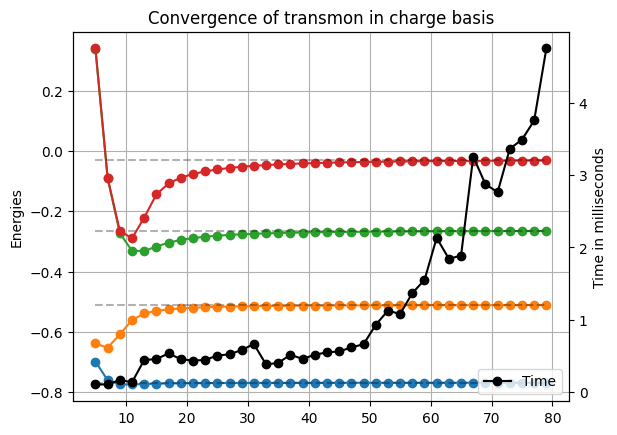

In [4]:
fig, ax1 = plt.subplots()

ax1.plot(res_array, E0, '-o')
ax1.plot([res_array[0], res_array[-1]], [E0[-1], E0[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E1, '-o')
ax1.plot([res_array[0], res_array[-1]], [E1[-1], E1[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E2, '-o')
ax1.plot([res_array[0], res_array[-1]], [E2[-1], E2[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E3, '-o')
ax1.plot([res_array[0], res_array[-1]], [E3[-1], E3[-1]], '--', color="black", alpha=0.3)
ax1.set(ylabel = "Energies", title = "Convergence of transmon in charge basis")
ax1.grid()

ax2 = ax1.twinx()

ax2.plot(res_array, tF, '-o', color = "black", label = "Time")
ax2.set(xlabel = "Resolution", ylabel="Time in milliseconds")
ax2.legend(loc = "lower right")

So from this we can see that even a resolution of around 50 is plenty to get a consistent result for the lowest couple of eigenvalues

### The convergence of the Transmon eigenvalues in the charge basis

In [5]:
E0 = []
E1 = []
E2 = []
E3 = []
tC = []

for i in range(len(res_array)):
    transmonC = Qubits.transmon_charge(res_array[i], 0.01, 0.90, 0.5) #parameters (n, EC, t, ng)
    
    t = timeit.timeit(stmt=transmonC.solve, number=interations)
    tC.append((t/interations)*1000)#I multiply by 1000 to get the result in milliseconds
    transmonC.solve()
    energies = transmonC.eigvals

    E0.append(energies[0])
    E1.append(energies[1])
    E2.append(energies[2])
    E3.append(energies[3])

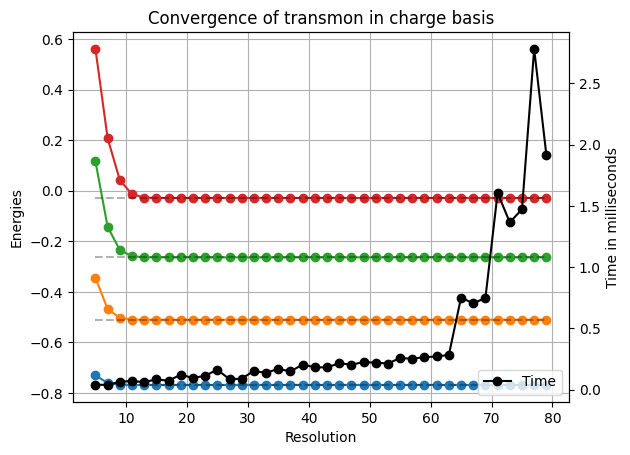

In [6]:
fig, ax1 = plt.subplots()

ax1.plot(res_array, E0, '-o')
ax1.plot([res_array[0], res_array[-1]], [E0[-1], E0[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E1, '-o')
ax1.plot([res_array[0], res_array[-1]], [E1[-1], E1[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E2, '-o')
ax1.plot([res_array[0], res_array[-1]], [E2[-1], E2[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E3, '-o')
ax1.plot([res_array[0], res_array[-1]], [E3[-1], E3[-1]], '--', color="black", alpha=0.3)
ax1.set(xlabel = "Resolution", ylabel = "Energies", title = "Convergence of transmon in charge basis")
ax1.grid()
ax2 = ax1.twinx()

ax2.plot(res_array, tC, '-o', color = "black", label = "Time")
ax2.set(xlabel = "Resolution", ylabel="Time in milliseconds")
ax2.legend(loc = "lower right")

#### Comparison of the computational time

Text(0.5, 1.0, 'Comparison of computational time')

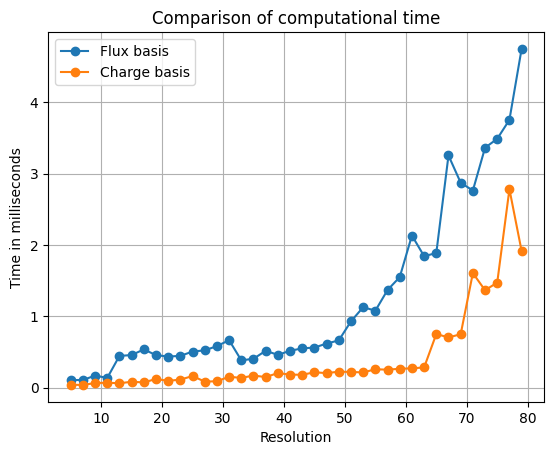

In [7]:
plt.plot(res_array, tF, '-o', label = "Flux basis")
plt.plot(res_array, tC, '-o', label = "Charge basis")
plt.grid(True)
plt.legend()
plt.xlabel("Resolution")
plt.ylabel("Time in milliseconds")
plt.title("Comparison of computational time")

### Convergence of the Gatemon energies

In [15]:
gatemonC = Qubits.gatemon_charge(20, 0.1, 1, 0.8, 0.2)#(N, EC, gap, T, ng)
gatemonF = Qubits.gatemon_flux(20, 0.1, 1, 0.8, 0.2)#(N, EC, gap, T, ng)

energy_charge_basis = np.zeros((4, len(res_array)))
energy_flux_basis = np.zeros((4, len(res_array)))


for i in range(len(res_array)):
    gatemonC.set_resolution(res_array[i])
    gatemonF.set_resolution(res_array[i])

    gatemonC.solve()
    gatemonF.solve()

    energy_charge_basis[:,i] = gatemonC.eigvals[:4]
    energy_flux_basis[:,i] = gatemonF.eigvals[:4]


21 10


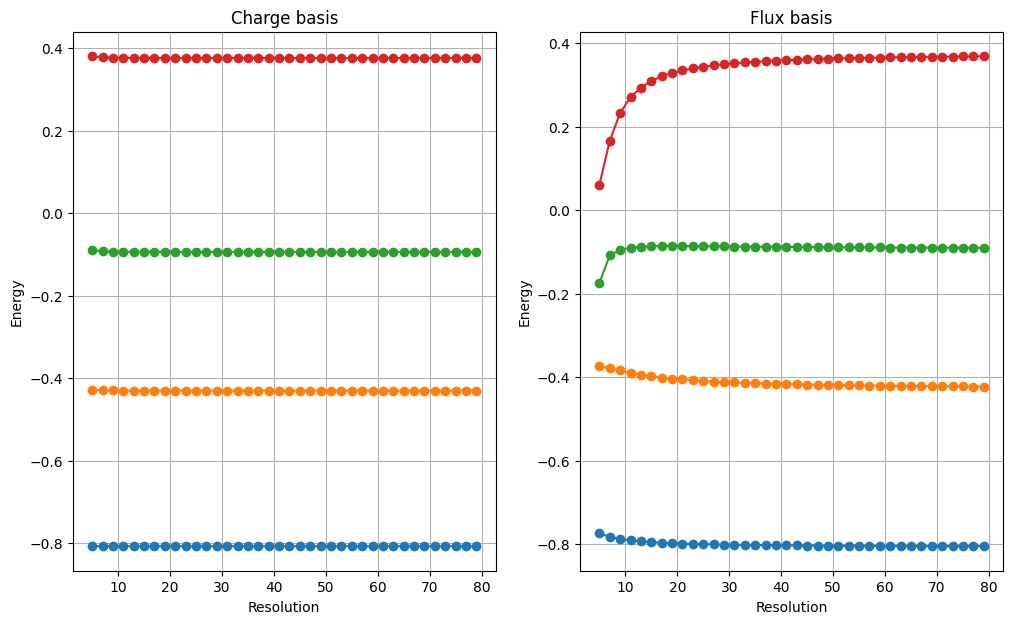

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.plot(res_array, energy_charge_basis[0], '-o')
ax1.plot(res_array, energy_charge_basis[1], '-o')
ax1.plot(res_array, energy_charge_basis[2], '-o')
ax1.plot(res_array, energy_charge_basis[3], '-o')
ax1.set(xlabel = "Resolution of subspace", ylabel = "Energy", title = "Charge basis")
ax1.grid()

ax2.plot(res_array, energy_flux_basis[0], '-o')
ax2.plot(res_array, energy_flux_basis[1], '-o')
ax2.plot(res_array, energy_flux_basis[2], '-o')
ax2.plot(res_array, energy_flux_basis[3], '-o')
ax2.set(xlabel = "Resolution of subspace", ylabel = "Energy", title = "Flux basis")
ax2.grid()
